# House Sales in King County, USA

By : Muhamamd Al-farisy

# Business Problem
- Harga rumah terus berubah. Realitas tidak mengetahui apakah harga rumah potensial akan meningkat atau tidak, membuat pemilik rumah masa depan sangat menantang untuk merencanakan, bersiap dan siap, tepat waktu dan finansial. Faktor ini berperan dalam mempengaruhi asumsi betapa sulitnya membeli rumah karena pencari rumah perlu memiliki daftar panjang apa yang diperlukan untuk membeli rumah. Mampu memprediksi fluktuasi harga rumah seharusnya tidak menjadi salah satu tugas dalam daftar periksa itu. Sangat menantang dan membutuhkan eksplorasi banyak faktor untuk dapat menghasilkan temuan. Untuk proyek ini, saya menggunakan satu set data (kc_data.csv). Dataset ini berisi harga jual rumah untuk King County, termasuk Seattle, antara Mei 2014 dan Mei 2015.

## Business Goal
- Tujuan saya adalah untuk mengeksplorasi korelasi antara harga rumah dan lainnya dalam dataset untuk menghasilkan temuan akhir dan prediksi harga yang dapat digunakan oleh penyewa rumah, investor dan pembisnis real estate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Feature Enginering

In [4]:
df['date'] = df['date'].astype('datetime64')

In [5]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

### Feature Selection

- Kolom yang digunakan adalah kolom yang memiliki korelasi positif, yang memiliki korelasi negatif akan di hapus. Kecuali memiliki korelasi secara bisnsi

In [6]:
df.drop(columns=['date'],inplace=True)

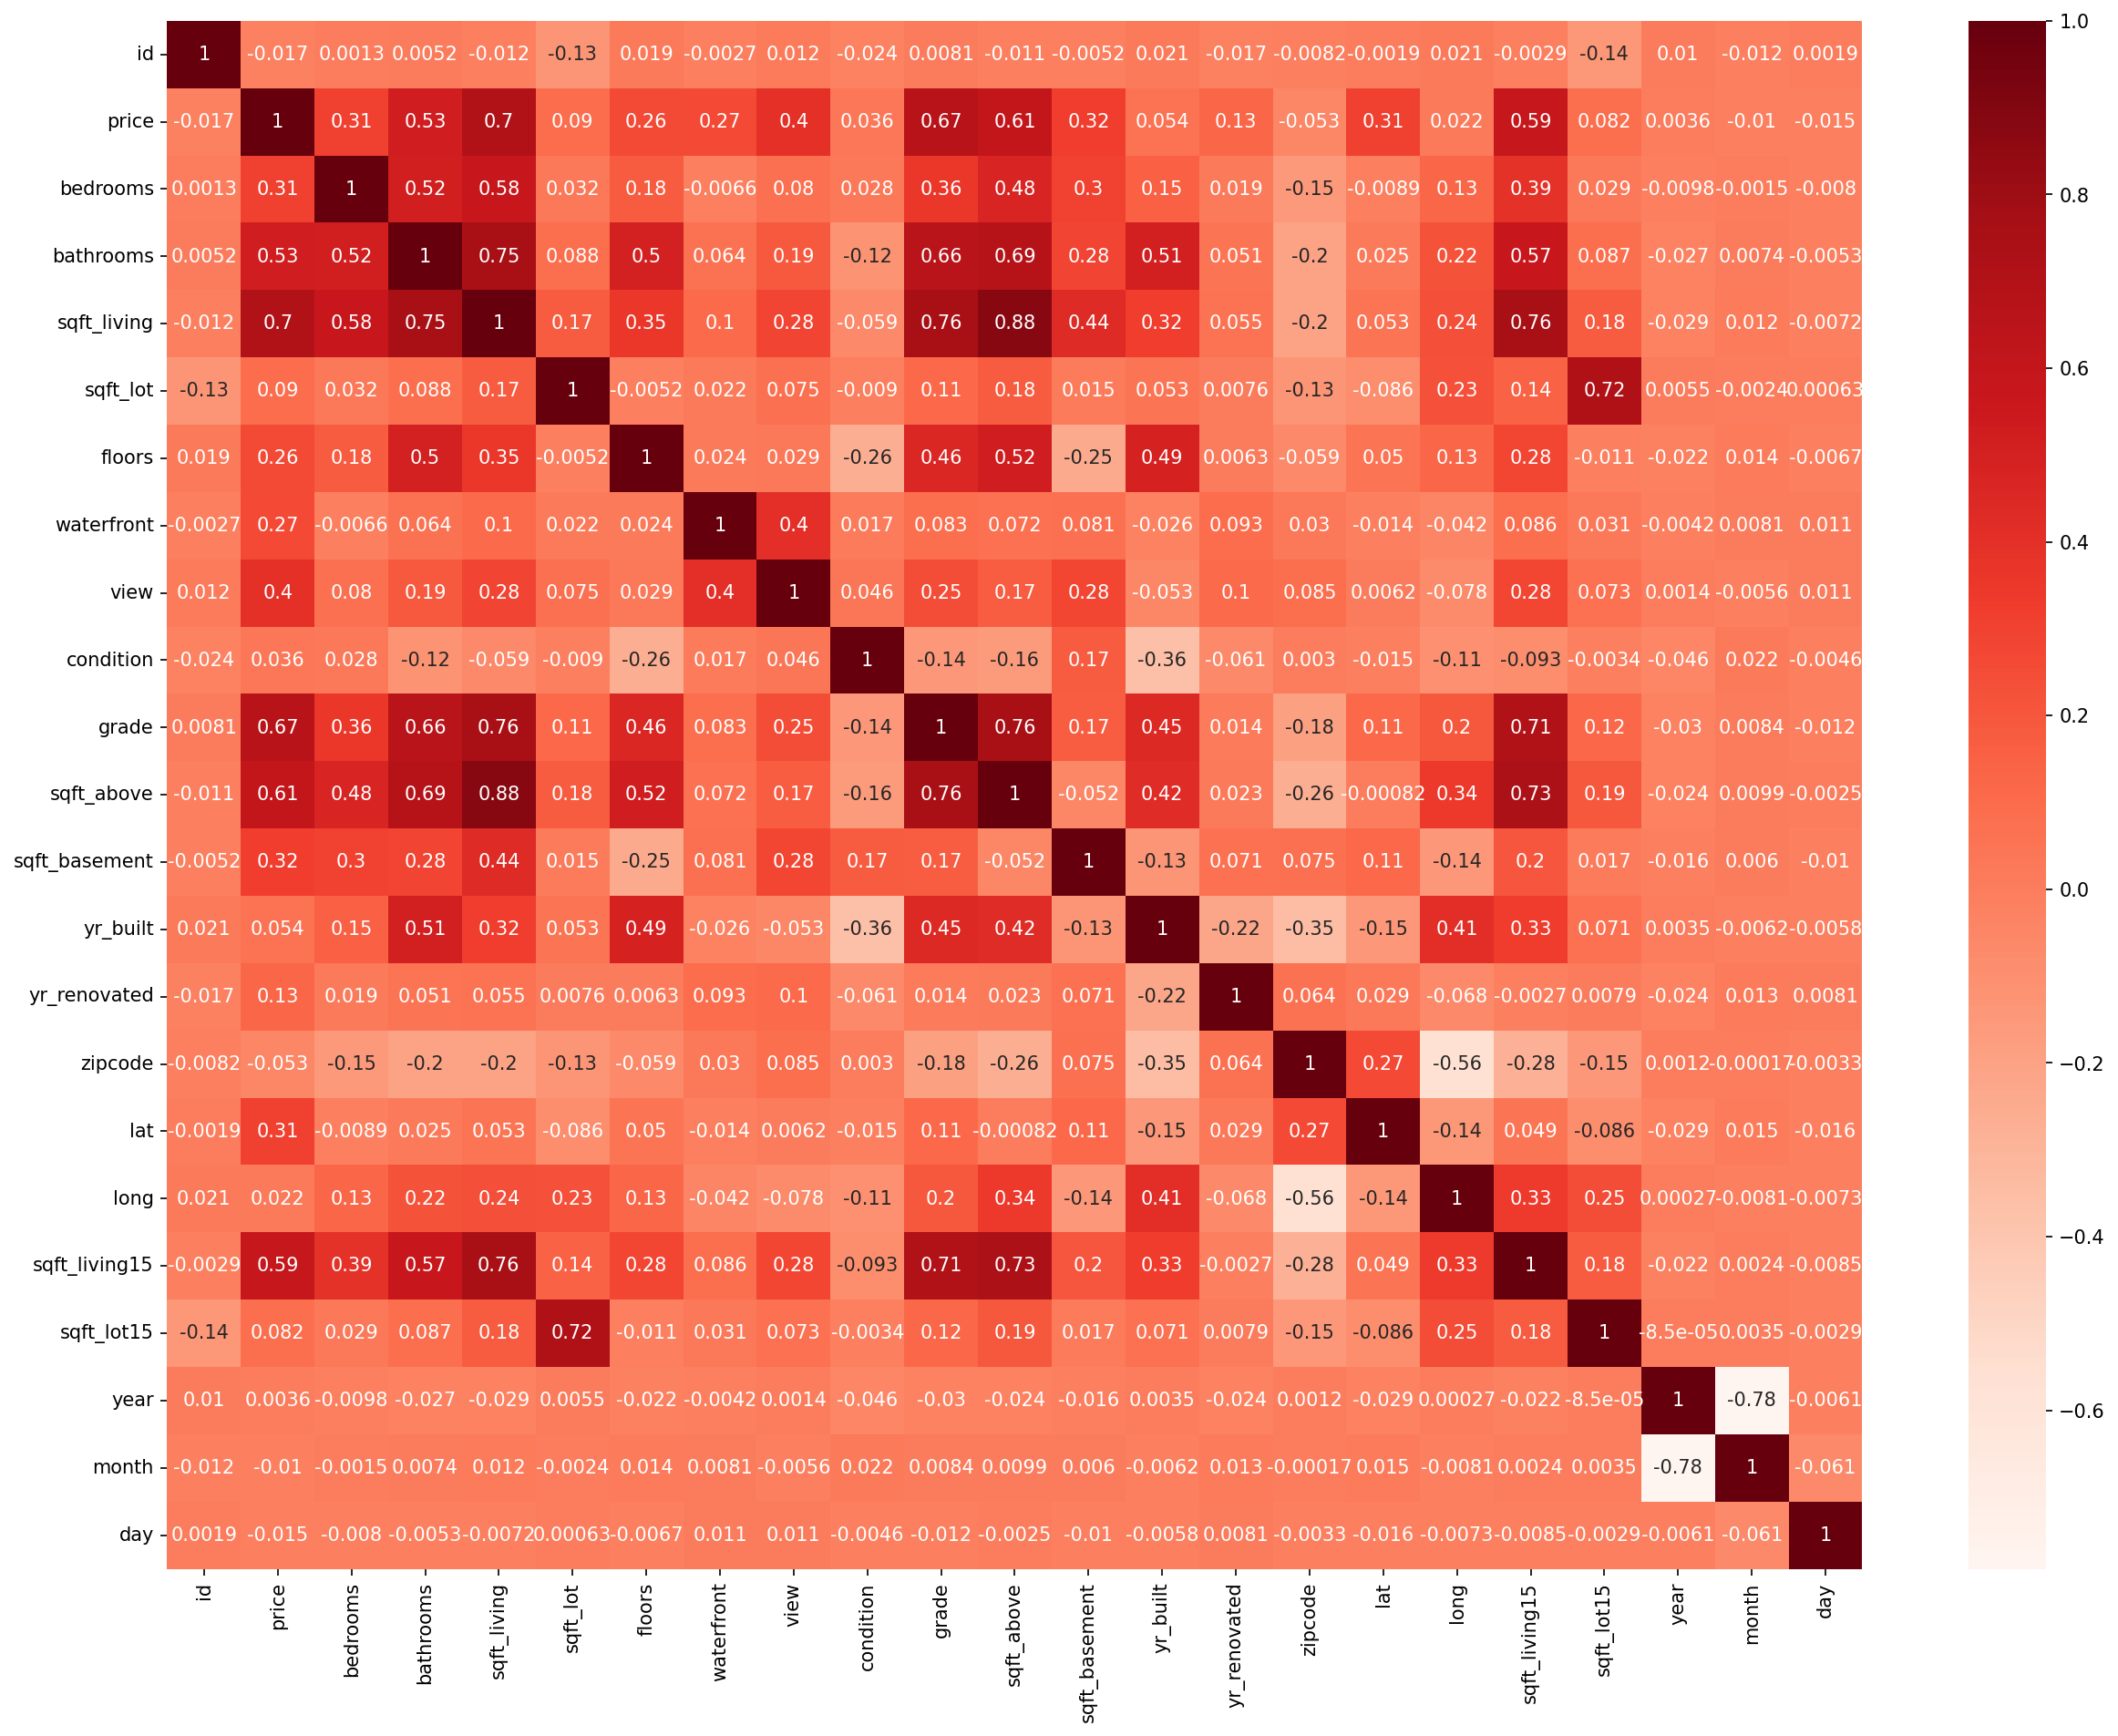

In [7]:
cor = df.corr()
plt.figure(figsize=(20,15),dpi=150)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#    Machine Learning

- Splitting Data

In [8]:
x = df.drop(columns=['price'],axis=1)
y = df['price']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.21,random_state=42)

## Regressi Linear

- Membuat Model Machine Learning - Regressi Linear

In [10]:
# Membuat model latihan
model = LinearRegression(fit_intercept=True)

In [11]:
# Membuat patern dari soal latihan dengan jawaban latihan
model.fit(x_train,y_train)

LinearRegression()

In [12]:
# Melihat skor antara soal ujian dan jawaban latihan
model.score(x_train,y_train)

0.7006215511671964

In [13]:
model.score(x_test,y_test)

0.7035004028696632

In [14]:
# Melihat intercept
model.intercept_

-68521389.38542545

In [15]:
# Melihat coef
model.coef_

array([-1.34174493e-06, -3.45188259e+04,  4.43645778e+04,  1.09541475e+02,
        8.23238035e-02,  7.16989776e+03,  5.57474007e+05,  5.43952139e+04,
        2.58448622e+04,  9.48245309e+04,  7.02780481e+01,  3.92634274e+01,
       -2.66739028e+03,  2.20950430e+01, -5.55872405e+02,  5.98216137e+05,
       -1.93367646e+05,  2.06553532e+01, -3.48991562e-01,  3.74985142e+04,
        1.16569065e+03, -3.61184824e+02])

In [16]:
# Membuat sebuah table untuk coefisien soal latihan
x_train.columns
pd.DataFrame(data=model.coef_,index=x_train.columns,columns=['coef'])

,coef
id,-0.000001
bedrooms,-34518.825915
bathrooms,44364.577821
sqft_living,109.541475
sqft_lot,0.082324
floors,7169.897759
waterfront,557474.006666
view,54395.213878
condition,25844.862236
grade,94824.530867


- Memprediksi Dengan Model Training

In [17]:
prediksi_train = model.predict(x_train)

In [18]:
r2_train_reg = r2_score(y_train,prediksi_train)
r2_train_reg

0.7006215511671964

In [19]:
mae_train_reg = mean_absolute_error(y_train,prediksi_train)
mae_train_reg

124910.12813576985

In [20]:
mse_train_reg = mean_squared_error(y_train,prediksi_train)
mse_train_reg

39260072329.556816

In [21]:
rmse_train_reg = np.sqrt(mse_train_reg)
rmse_train_reg

198141.54619755247

---

- Memprediksi Dengan Model Training

In [22]:
prediksi_test = model.predict(x_test)

In [23]:
r2_test_reg = r2_score(y_test,prediksi_test)
r2_test_reg

0.7035004028696632

In [24]:
mae_test_reg = mean_absolute_error(y_test,prediksi_test)
mae_test_reg

126533.99560332553

In [25]:
mse_test_reg = mean_squared_error(y_test,prediksi_test)
mse_test_reg

43994839786.795006

In [26]:
rmse_test_reg = np.sqrt(mse_test_reg)
rmse_test_reg

209749.46909776673

In [27]:
data = {
    "Training" : [r2_train_reg, mae_train_reg, mse_train_reg, rmse_train_reg],
    "Testing" : [r2_test_reg, mae_test_reg, mse_test_reg, rmse_test_reg]
}
pd.DataFrame(data, index=["R Squared", "MAE", "MSE", "RMSE"]).round(2).T

,R Squared,MAE,MSE,RMSE
Training,0.7,124910.13,3.926007e+10,198141.55
Testing,0.7,126534.00,4.399484e+10,209749.47


---

---

## Polynomial Linear

- Membuat Rumus untuk Feature Enginering - Polynomial Linear

- Splitting Data

In [28]:
# 
Poli = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)

In [29]:
# Membuat patern dari soal latihan dengan jawaban latihan
Poli = Poli.fit(x_train)

In [30]:
# Melatih variabel x train dengan Polilnomial
x_trainPoli = Poli.transform(x_train)

# Melatih variabel x test dengan Polilnomial
x_testPoli = Poli.transform(x_test)

In [31]:
#
df_xtrainpoli = pd.DataFrame(x_trainPoli)

In [32]:
#
df_xtestpoli = pd.DataFrame(x_testPoli)

- Membuat Model Polynomial Regression

In [33]:
Model_PF = LinearRegression()

In [34]:
# Membuat patern dari soal latihan dengan jawaban latihan
Model_PF.fit(df_xtrainpoli,y_train)

LinearRegression()

In [35]:
PF_train = Model_PF.predict(df_xtrainpoli)

In [36]:
PF_test = Model_PF.predict(df_xtestpoli)

- Evaluation Matrix Training Polynomial

In [37]:
r2_PF_train = r2_score (y_train,PF_train)
r2_PF_train

0.8450514037305266

In [38]:
mae_PF_train = mean_absolute_error(y_train,PF_train)
mae_PF_train

96245.34673405282

In [39]:
mse_PF_train = mean_squared_error(y_train,PF_train)
mse_PF_train

20319742855.97361

In [40]:
rmse_PF_train = np.square(mse_PF_train)
rmse_PF_train

4.1289194973289054e+20

- Evaluation Matrix Test Polynomial

In [41]:
r2_PF_test = r2_score (y_test,PF_test)
r2_PF_test

0.698352361106108

In [42]:
mae_PF_test = mean_absolute_error(y_test,PF_test)
mae_PF_test

115070.52387480602

In [43]:
mse_PF_test = mean_squared_error(y_test,PF_test)
mse_PF_test

44758710209.538895

In [44]:
rmse_PF_test = np.square(mse_PF_test)
rmse_PF_test

2.0033421396214814e+21

In [45]:
data_poli = {
    "Regressi Linear Training" : [r2_train_reg, mae_train_reg, mse_train_reg, rmse_test_reg],
    "Regressi Linear Testing" : [r2_test_reg, mae_test_reg, mse_test_reg, rmse_test_reg],
    "Polynomial Linear Training" : [r2_PF_train, mae_PF_train, mse_PF_train, rmse_PF_train],
    "Polynomial Linear Testing" : [r2_PF_test, mae_PF_test, mse_PF_test, rmse_PF_test]
}
data_poli_print = pd.DataFrame(data_poli, index=["R Squared", "MAE", "MSE", "RMSE"]).round(2).T
data_poli_print

,R Squared,MAE,MSE,RMSE
Regressi Linear Training,0.70,124910.13,3.926007e+10,2.097495e+05
Regressi Linear Testing,0.70,126534.00,4.399484e+10,2.097495e+05
Polynomial Linear Training,0.85,96245.35,2.031974e+10,4.128919e+20
Polynomial Linear Testing,0.70,115070.52,4.475871e+10,2.003342e+21


---

## RIDGE

- Membuat model Ridge

In [46]:
Model_R = Ridge()

In [47]:
Model_R.fit(df_xtrainpoli, y_train)

Ridge()

- Melatih model ridge training dari polynomial

In [48]:
Ridge_train = Model_R.predict(df_xtrainpoli)

- Melatih model ridge test dari polynomial

In [49]:
Ridge_test = Model_R.predict(df_xtestpoli)

- Menilai evaluasi skor training ridge

In [50]:
r2_ridge_train = r2_score(y_train,Ridge_train)
r2_ridge_train

-1.5039557738575433

In [51]:
mae_ridge_train = mean_absolute_error(y_train,Ridge_train)
mae_ridge_train

390972.76619515114

In [52]:
mse_ridge_train = mean_squared_error(y_train,Ridge_train)
mse_ridge_train

328365268692.27

In [53]:
rmse_ridge_train = np.sqrt(mse_train_reg)
rmse_ridge_train

198141.54619755247

- Menilai evaluasi skor test ridge

In [54]:
r2_ridge_test = r2_score(y_test,Ridge_test)
r2_ridge_test

-9.586828860798986

In [55]:
mae_ridge_test = mean_absolute_error(y_test,Ridge_test)
mae_ridge_test

477893.32926408673

In [56]:
mse_ridge_test = mean_squared_error(y_test,Ridge_test)
mse_ridge_test

1570881863209.8354

In [57]:
rmse_ridge_test = np.sqrt(mse_ridge_test)
rmse_ridge_test

1253348.2609433962

In [58]:
data_ridge = {
    "Regressi Linear Training" : [r2_train_reg, mae_train_reg, mse_train_reg, rmse_test_reg],
    "Regressi Linear Testing" : [r2_test_reg, mae_test_reg, mse_test_reg, rmse_test_reg],
    "Polynomial Linear Training" : [r2_PF_train, mae_PF_train, mse_PF_train, rmse_PF_train],
    "Polynomial Linear Testing" : [r2_PF_test, mae_PF_test, mse_PF_test, rmse_PF_test],
    "Ridge Linear Training" : [r2_ridge_train,mae_ridge_train,mse_ridge_train,rmse_ridge_train],
    "Ridge Linear Testing" : [r2_ridge_test, mae_ridge_test, mse_ridge_test, rmse_ridge_test]
}
data_ridge_print = pd.DataFrame(data_ridge, index=["R Squared", "MAE", "MSE", "RMSE"]).round(2).T
data_ridge_print

,R Squared,MAE,MSE,RMSE
Regressi Linear Training,0.70,124910.13,3.926007e+10,2.097495e+05
Regressi Linear Testing,0.70,126534.00,4.399484e+10,2.097495e+05
Polynomial Linear Training,0.85,96245.35,2.031974e+10,4.128919e+20
Polynomial Linear Testing,0.70,115070.52,4.475871e+10,2.003342e+21
Ridge Linear Training,-1.50,390972.77,3.283653e+11,1.981415e+05
Ridge Linear Testing,-9.59,477893.33,1.570882e+12,1.253348e+06


## Tunning Ridge

- Proses Mencari nilai-value dari Hyper Parameter agar mendapat hasil evaluation matrix terbaik

In [59]:
param_ridge = [0.001, 0.01, 1,2,3,10,15,20,30,40,50,60,70,80,90,100]

In [60]:
train_ridge = []
test_ridge = []

for i in param_ridge :
    Model_R = Ridge(alpha=i)
    Model_R.fit(df_xtrainpoli,y_train)
    y_pred_train = Model_R.predict(df_xtrainpoli)
    R2_train = r2_score(y_train,y_pred_train)
    train_ridge.append(R2_train)
    y_pred_test = Model_R.predict(df_xtestpoli)
    R2_test = r2_score(y_test,y_pred_test)
    test_ridge.append(R2_test)

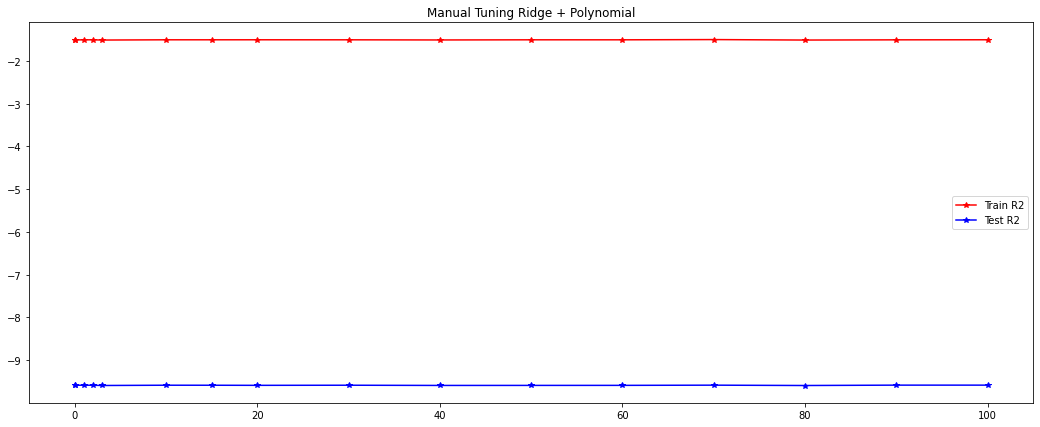

In [61]:
plt.figure(figsize=(18,7))
plt.plot(param_ridge, train_ridge, 'r*-')
plt.plot(param_ridge, test_ridge, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Ridge + Polynomial")
plt.show()

In [62]:
test_ridge

[-9.587350082358272,
 -9.586915816032784,
 -9.586828860798986,
 -9.586647707335002,
 -9.593260808949845,
 -9.586677949320237,
 -9.587190605097014,
 -9.589540258802641,
 -9.586757344809271,
 -9.59183212216981,
 -9.591043443650697,
 -9.590135362799135,
 -9.585337290153593,
 -9.593408515699378,
 -9.584725577047855,
 -9.58472458808778]

In [63]:
np.max(test_ridge)

-9.58472458808778

In [64]:
np.argmax(test_ridge)

15

In [65]:
param_ridge[np.argmax(test_ridge)]

100

In [66]:
Alpha_ridge = np.arange(0, 2, 0.01)

In [67]:
def Manual_Tune_Ridge(Alpha, x_train, x_test, y_train, y_test, Model):
    train_r = []
    test_r = []
    
    for i in Alpha_ridge:
        Model_R = Model(alpha=i)
        Model_R.fit(x_train, y_train)
        y_pred_tr = Model_R.predict(x_train)
        R2_train = r2_score(y_train, y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts = Model_R.predict(x_test)
        R2_test = r2_score(y_test, y_pred_ts)
        test_r.append(R2_test)
    return train_r, test_r

In [68]:
train_Ridge, test_Ridge = Manual_Tune_Ridge(Alpha_ridge, x_trainPoli, x_testPoli, y_train, y_test, Ridge)

In [69]:
test_ridge

[-9.587350082358272,
 -9.586915816032784,
 -9.586828860798986,
 -9.586647707335002,
 -9.593260808949845,
 -9.586677949320237,
 -9.587190605097014,
 -9.589540258802641,
 -9.586757344809271,
 -9.59183212216981,
 -9.591043443650697,
 -9.590135362799135,
 -9.585337290153593,
 -9.593408515699378,
 -9.584725577047855,
 -9.58472458808778]

In [70]:
np.argmax(test_ridge)

15

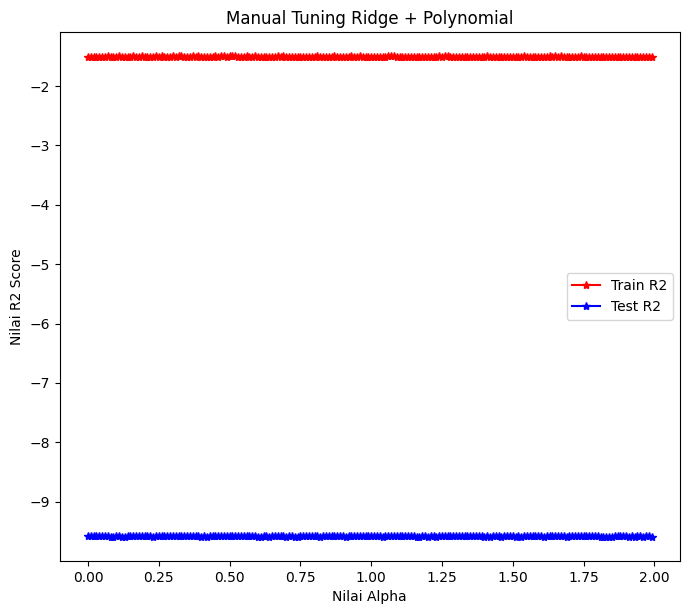

In [71]:
plt.figure(figsize=(8,7),dpi=100)
plt.plot(Alpha_ridge, train_Ridge, 'r*-')
plt.plot(Alpha_ridge, test_Ridge, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Ridge + Polynomial")
plt.xlabel("Nilai Alpha")
plt.ylabel("Nilai R2 Score")
plt.show()

In [72]:
print('Top EvaMatrix Test Ridge : ', np.max(test_Ridge))
print('Top Alpha :', Alpha_ridge[np.argmax(test_Ridge)])

Top EvaMatrix Test Ridge :  -9.579828422771932
Top Alpha : 1.6300000000000001


In [73]:
def Eva_Matrix(Model, x, y_true):
    y_pred = Model.predict(x)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [74]:
Model_R_tuned = Ridge(alpha=1.98)

In [75]:
Model_R_tuned.fit(df_xtrainpoli, y_train)

Ridge(alpha=1.98)

In [76]:
r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr = Eva_Matrix(Model_R_tuned, df_xtrainpoli, y_train)

In [77]:
r2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts = Eva_Matrix(Model_R_tuned, df_xtestpoli, y_test)

In [78]:
eva_data_final = {
    "Ridge Tuned Training" : [r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr],
    "Ridge Tuned Testing" : [r2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts]}
hasil_tuning = pd.DataFrame(eva_data_final, index=['R2', 'MAE', 'MSE', 'RMSE']).round(2)
hasil_tuning.T

,R2,MAE,MSE,RMSE
Ridge Tuned Training,-1.50,390829.68,3.282001e+11,572887.47
Ridge Tuned Testing,-9.59,477761.11,1.570712e+12,1253280.68


In [79]:
data_ridge_setelah_tuning = {
    "Regressi Linear Training" : [r2_train_reg, mae_train_reg, mse_train_reg, rmse_test_reg],
    "Regressi Linear Testing" : [r2_test_reg, mae_test_reg, mse_test_reg, rmse_test_reg],
    "Polynomial Linear Training" : [r2_PF_train, mae_PF_train, mse_PF_train, rmse_PF_train],
    "Polynomial Linear Testing" : [r2_PF_test, mae_PF_test, mse_PF_test, rmse_PF_test],
    "Ridge Linear Training" : [r2_ridge_train,mae_ridge_train,mse_ridge_train,rmse_ridge_train],
    "Ridge Linear Testing" : [r2_ridge_test, mae_ridge_test, mse_ridge_test, rmse_ridge_test],
    "Ridge Tuned Training" : [r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr],
    "Ridge Tuned Testing" : [r2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts]}
data_ridge_setelah_tuning = pd.DataFrame(data_ridge_setelah_tuning, index=["R Squared", "MAE", "MSE", "RMSE"]).round(2).T
data_ridge_setelah_tuning

,R Squared,MAE,MSE,RMSE
Regressi Linear Training,0.70,124910.13,3.926007e+10,2.097495e+05
Regressi Linear Testing,0.70,126534.00,4.399484e+10,2.097495e+05
Polynomial Linear Training,0.85,96245.35,2.031974e+10,4.128919e+20
Polynomial Linear Testing,0.70,115070.52,4.475871e+10,2.003342e+21
Ridge Linear Training,-1.50,390972.77,3.283653e+11,1.981415e+05
Ridge Linear Testing,-9.59,477893.33,1.570882e+12,1.253348e+06
Ridge Tuned Training,-1.50,390829.68,3.282001e+11,5.728875e+05
Ridge Tuned Testing,-9.59,477761.11,1.570712e+12,1.253281e+06


---

### LASSO

- Membuat model Lasso

In [80]:
Model_L = Lasso()

In [81]:
Model_L.fit(df_xtrainpoli,y_train)

Lasso()

- Melatih model ridge training dari polynomial untutk memprediksi jawaban dari target

In [82]:
Lasso_train = Model_L.predict(df_xtrainpoli)

- Menilai evaluasi skor training ridge

In [83]:
r2_lasso_train = r2_score(y_train, Lasso_train)

In [84]:
mae_lasso_train = mean_absolute_error(y_train,Lasso_train)

In [85]:
mse_lasso_train = mean_squared_error(y_train,Lasso_train)

In [86]:
rmse_lasso_train = np.sqrt(mse_lasso_train)

- Menilai evaluasi skore test Lasso

In [87]:
Lasso_test = Model_L.predict(df_xtestpoli)

In [88]:
r2_lasso_test = r2_score(y_test, Lasso_test)

In [89]:
mae_lasso_test = mean_absolute_error(y_test,Lasso_test)

In [90]:
mse_lasso_test = mean_squared_error(y_test,Lasso_test)

In [91]:
rmse_lasso_test = np.sqrt(mse_lasso_test)

In [92]:
data_lasso = {
    "Regressi Linear Training" : [r2_train_reg, mae_train_reg, mse_train_reg, rmse_test_reg],
    "Regressi Linear Testing" : [r2_test_reg, mae_test_reg, mse_test_reg, rmse_test_reg],
    "Polynomial Linear Training" : [r2_PF_train, mae_PF_train, mse_PF_train, rmse_PF_train],
    "Polynomial Linear Testing" : [r2_PF_test, mae_PF_test, mse_PF_test, rmse_PF_test],
    "Ridge Linear Training" : [r2_ridge_train,mae_ridge_train,mse_ridge_train,rmse_ridge_train],
    "Ridge Linear Testing" : [r2_ridge_test, mae_ridge_test, mse_ridge_test, rmse_ridge_test],
    "Ridge Tuned Training" : [r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr],
    "Ridge Tuned Testing" : [r2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts],
    "Lasso Linear Training" : [r2_lasso_train,mae_lasso_train,mse_lasso_train,rmse_lasso_train],
    "Lasso Linear Testing" : [r2_lasso_test, mae_lasso_test, mse_lasso_test, rmse_lasso_test]
}
data_lasso_print = pd.DataFrame(data_lasso, index=["R Squared", "MAE", "MSE", "RMSE"]).round(2).T
data_lasso_print

,R Squared,MAE,MSE,RMSE
Regressi Linear Training,0.70,124910.13,3.926007e+10,2.097495e+05
Regressi Linear Testing,0.70,126534.00,4.399484e+10,2.097495e+05
Polynomial Linear Training,0.85,96245.35,2.031974e+10,4.128919e+20
Polynomial Linear Testing,0.70,115070.52,4.475871e+10,2.003342e+21
Ridge Linear Training,-1.50,390972.77,3.283653e+11,1.981415e+05
Ridge Linear Testing,-9.59,477893.33,1.570882e+12,1.253348e+06
Ridge Tuned Training,-1.50,390829.68,3.282001e+11,5.728875e+05
Ridge Tuned Testing,-9.59,477761.11,1.570712e+12,1.253281e+06
Lasso Linear Training,0.82,101055.69,2.316662e+10,1.522059e+05
Lasso Linear Testing,0.70,115043.23,4.445691e+10,2.108481e+05


## Tunning Lasso

  - proses mencari nilai values dari hyper parametere agar mendapatkan hasil evaluation matrik terbaik

In [93]:
param_lasso = [0.001, 0.01, 1,2,3,10,15,20,30,40,50,60,70,80,90,100]

In [94]:
train_lasso = []
test_lasso = []

for i in param_lasso :
    Model_L = Lasso(alpha=i)
    Model_L.fit(df_xtrainpoli,y_train)
    y_pred_train = Model_L.predict(df_xtrainpoli)
    R2_train = r2_score(y_train,y_pred_train)
    train_lasso.append(R2_train)
    y_pred_test = Model_L.predict(df_xtestpoli)
    R2_test = r2_score(y_test,y_pred_test)
    test_lasso.append(R2_test)

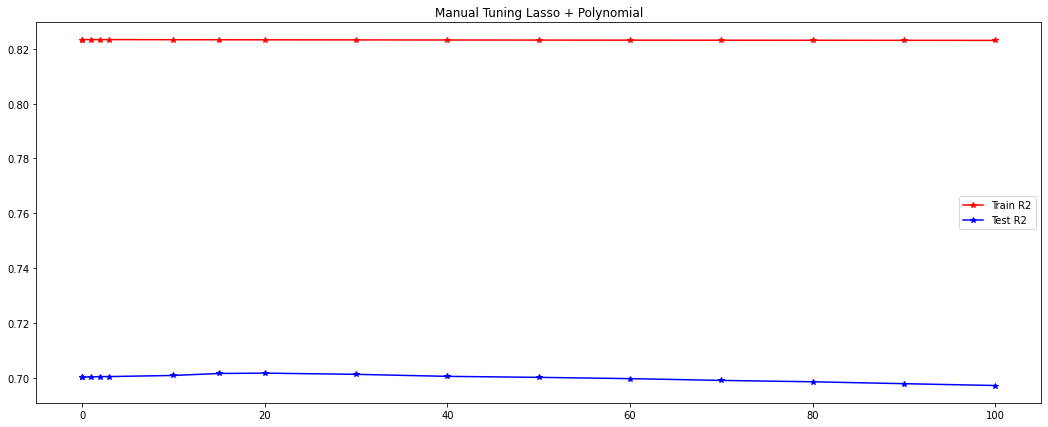

In [95]:
plt.figure(figsize=(18,7))
plt.plot(param_lasso, train_lasso, 'r*-')
plt.plot(param_lasso, test_lasso, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Lasso + Polynomial")
plt.show()

In [96]:
test_lasso

[0.700291286039955,
 0.7002920334271914,
 0.7003862851392533,
 0.7005028527099166,
 0.7005022123532885,
 0.7009038221164849,
 0.7016286188500145,
 0.7017541560464169,
 0.7013144562848046,
 0.7005784283160893,
 0.7002146392889098,
 0.699749809327373,
 0.6991016733233499,
 0.6986015539669046,
 0.6979077304024521,
 0.6972431498558569]

In [97]:
np.max(test_lasso)

0.7017541560464169

In [98]:
np.argmax(test_lasso)

7

In [99]:
param_ridge[np.argmax(test_lasso)]

20

In [100]:
Alpha_lasso = np.arange(0, 1, 0.001)

In [101]:
def Manual_Tune_Lasso(Alpha, x_train, x_test, y_train, y_test, Model):
    train_r = []
    test_r = []
    
    for i in Alpha_lasso:
        Model_L = Model(alpha=i)
        Model_L.fit(x_train, y_train)
        y_pred_tr = Model_R.predict(x_train)
        R2_train = r2_score(y_train, y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts = Model_L.predict(x_test)
        R2_test = r2_score(y_test, y_pred_ts)
        test_r.append(R2_test)
    return train_r, test_r

In [102]:
train_lasso, test_lasso = Manual_Tune_Lasso(Alpha_lasso, x_trainPoli, x_testPoli, y_train, y_test, Ridge)

In [ ]:
test_lasso

[0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204081416,
 0.7886528204

In [ ]:
np.argmax(test_lasso)

0

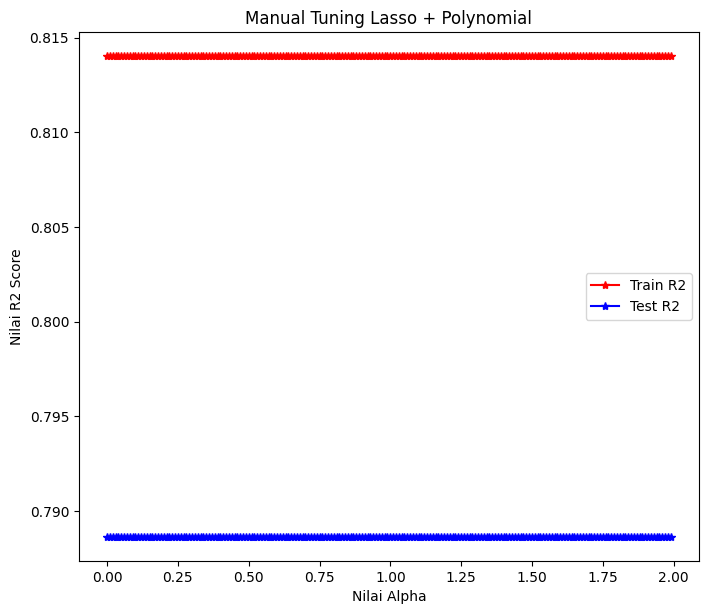

In [ ]:
plt.figure(figsize=(8,7),dpi=100)
plt.plot(Alpha_lasso, train_lasso, 'r*-')
plt.plot(Alpha_lasso, test_lasso, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Lasso + Polynomial")
plt.xlabel("Nilai Alpha")
plt.ylabel("Nilai R2 Score")
plt.show()

In [ ]:
print('Top EvaMatrix Test Ridge : ', np.max(test_lasso))
print('Top Alpha :', Alpha_lasso[np.argmax(test_lasso)])

Top EvaMatrix Test Ridge :  0.7886528204081416
Top Alpha : 0.0


In [ ]:
def Eva_Matrix(Model, x, y_true):
    y_pred = Model.predict(x)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [ ]:
Model_L_tuned = Lasso(alpha=0.99)

In [ ]:
Model_L_tuned.fit(df_xtrainpoli, y_train)

Lasso(alpha=0.99)

In [ ]:
r2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr = Eva_Matrix(Model_L_tuned, df_xtrainpoli, y_train)

In [ ]:
r2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts = Eva_Matrix(Model_L_tuned, df_xtestpoli, y_test)

In [ ]:
eva_data_final_lasso = {
    "Lasso Tuned Training" : [r2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr],
    "Lasso Tuned Testing" : [r2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts]}
hasil_tuning_lasso = pd.DataFrame(eva_data_final_lasso, index=['R2', 'MAE', 'MSE', 'RMSE']).round(2)
hasil_tuning_lasso

,Lasso Tuned Training,Lasso Tuned Testing
R2,7.900000e-01,7.600000e-01
MAE,1.078654e+05,1.129526e+05
MSE,2.738077e+10,3.567047e+10
RMSE,1.654714e+05,1.888663e+05


In [ ]:
data_lasso_setelah_tuning = {
    "Regressi Linear Training" : [r2_train_reg, mae_train_reg, mse_train_reg, rmse_test_reg],
    "Regressi Linear Testing" : [r2_test_reg, mae_test_reg, mse_test_reg, rmse_test_reg],
    "Polynomial Linear Training" : [r2_PF_train, mae_PF_train, mse_PF_train, rmse_PF_train],
    "Polynomial Linear Testing" : [r2_PF_test, mae_PF_test, mse_PF_test, rmse_PF_test],
    "Ridge Linear Training" : [r2_ridge_train,mae_ridge_train,mse_ridge_train,rmse_ridge_train],
    "Ridge Linear Testing" : [r2_ridge_test, mae_ridge_test, mse_ridge_test, rmse_ridge_test],
    "Ridge Tuned Training" : [r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr],
    "Ridge Tuned Testing" : [r2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts],
    "Lasso Linear Training" : [r2_lasso_train,mae_lasso_train,mse_lasso_train,rmse_lasso_train],
    "Lasso Linear Testing" : [r2_lasso_test, mae_lasso_test, mse_lasso_test, rmse_lasso_test],
    "Lasso Tuned Training" : [r2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr],
    "Lasso Tuned Testing" : [r2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts]}
data_lasso_setelah_tuning_final = pd.DataFrame(data_lasso_setelah_tuning, index=["R Squared", "MAE", "MSE", "RMSE"]).round(2).T
data_lasso_setelah_tuning_final

,R Squared,MAE,MSE,RMSE
Regressi Linear Training,0.70,124851.03,3.925439e+10,2.076675e+05
Regressi Linear Testing,0.71,125853.96,4.312578e+10,2.076675e+05
Polynomial Linear Training,0.76,118998.31,3.193845e+10,1.020065e+21
Polynomial Linear Testing,0.73,126461.44,4.010976e+10,1.608793e+21
Ridge Linear Training,0.80,108061.21,2.657250e+10,1.981272e+05
Ridge Linear Testing,0.77,114696.11,3.378219e+10,1.837993e+05
Ridge Tuned Training,0.80,105971.87,2.582455e+10,1.607002e+05
Ridge Tuned Testing,0.78,112564.53,3.290804e+10,1.814057e+05
Lasso Linear Training,0.79,107865.37,2.738076e+10,1.654713e+05
Lasso Linear Testing,0.76,112952.60,3.567049e+10,1.888663e+05


# Kesimpulan